In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report


import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.shape

(400, 5)

In [7]:
data.drop(['User ID', 'Gender'], axis = 1, inplace = True)

In [9]:
data.shape

(400, 3)

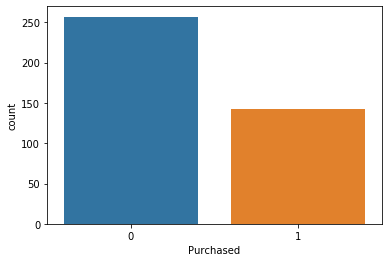

In [10]:
sb.countplot(data['Purchased'])
plt.show()

# Applying Standard Scalar

In [11]:
X = data.iloc[:, 0:-1]
Y = data.iloc[:, -1:].values

In [12]:
X.iloc[0:1,:]

,Age,EstimatedSalary
0,19,19000


In [13]:
Y[0]

array([0])

In [14]:
X.shape, Y.shape

((400, 2), (400, 1))

In [15]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
X[0]

array([-1.78179743, -1.49004624])

# Splitting the data to Training and Test Dataset

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [18]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((320, 2), (320, 1), (80, 2), (80, 1))

# Fitting the Training dataset to SVC Model

In [19]:
classifier = SVC()
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Testing the performance of the model using K fold cross validation

In [27]:
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

In [28]:
accuracies

array([0.84848485, 0.875     , 0.90625   , 0.84375   , 0.90625   ,
       0.875     , 0.875     , 0.9375    , 1.        , 0.93548387])

In [29]:
accuracies.mean()

0.9002718719452589

# Applying Grid Search to optimize the Model

In [43]:
parameters = [{'C': [1,10,100, 1000], 'kernel': ['linear']},
             {'C' : [1,10,100,1000], 'kernel': ['rbf'], 'gamma' : [0.5, 0.1, 0.01, 0.001]}]

grid_search = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)


In [44]:
grid_search = grid_search.fit(x_train, y_train)

In [45]:
grid_search.best_params_

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}

In [46]:
best_score = grid_search.best_score_

In [47]:
best_score

0.9

# Using the best parameters obtained from grid search to fit the model to the training dataset

In [48]:
optimized_classifier = SVC(kernel = 'rbf', C = 1, gamma = 0.5)

In [49]:
optimized_classifier.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Testing the performance of the optimized model using K fold cross validation

In [50]:
acc  = cross_val_score(estimator = optimized_classifier, X = x_train, y = y_train, cv = 10)

In [51]:
acc

array([0.84848485, 0.875     , 0.90625   , 0.84375   , 0.90625   ,
       0.875     , 0.875     , 0.9375    , 1.        , 0.93548387])

In [52]:
acc.mean()

0.9002718719452589

here we got the same accuracy before and after optimizing the model using grid search because the best set of parameters we got from grid search are the default parameters i.e we used same parameters before and after using grid serach

# Predicting on Test Dataset

In [56]:
y_pred = optimized_classifier.predict(x_test)

In [57]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [59]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[55,  3],
       [ 1, 21]])